In [1]:
import numpy as np
from itertools import count
from IPython import display

from screen_convert import SimpleConverter
from state_gen import StackStateGenerator

from env_factory import EnvFactory

In [2]:
CUSTOM_MOVEMENTS = [
    ['right'],
    ['right', 'A']
]
env_factory = EnvFactory(env_id="SuperMarioBros-1-1-v0",
                        movements=CUSTOM_MOVEMENTS,
                        skip_frames=4,
                        num_stack=4,
                        random_seed=42)
env = env_factory.gen_env()

observation = env.reset()

/home/vitor/workspace/py_projects/pytorch_projects/venv_cu116/lib/python3.8/site-packages/gym/envs/registration.py:593: UserWarning: WARN: The environment SuperMarioBros-1-1-v0 is out of date. You should consider upgrading to version `v3`.
  logger.warn(
/home/vitor/workspace/py_projects/pytorch_projects/venv_cu116/lib/python3.8/site-packages/gym/core.py:329: DeprecationWarning: WARN: Initializing wrapper in old step API which returns one bool instead of two. It is recommended to set `new_step_api=True` to use new step API. This will be the default behaviour in future.
  deprecation(
/home/vitor/workspace/py_projects/pytorch_projects/venv_cu116/lib/python3.8/site-packages/gym/wrappers/step_api_compatibility.py:39: DeprecationWarning: WARN: Initializing environment in old step API which returns one bool instead of two. It is recommended to set `new_step_api=True` to use new step API. This will be the default behaviour in future.
  deprecation(


In [3]:
screen_convert = SimpleConverter(resize_min=(84, 84))
state_generator = StackStateGenerator(screen_converter=screen_convert)

In [4]:
env.reset()
rewards = []
infos = []
states = []
import time

for t in count():
    observation, reward, done, info = env.step(env.action_space.sample())
    states.append(state_generator.gen_state(env=env, frames=observation))
    rewards.append(reward)
    infos.append(info)
#     env.render()
#     time.sleep(1)
    if done:
        break

/home/vitor/workspace/py_projects/pytorch_projects/venv_cu116/lib/python3.8/site-packages/gym/utils/passive_env_checker.py:227: DeprecationWarning: WARN: Core environment is written in old step API which returns one bool instead of two. It is recommended to rewrite the environment with new step API. 
  logger.deprecation(


In [5]:
len(states)

568

In [6]:
states[0].shape

torch.Size([4, 84, 84])

In [7]:
infos[-1]

{'coins': 0,
 'flag_get': False,
 'life': 2,
 'score': 600,
 'stage': 1,
 'status': 'small',
 'time': 287,
 'world': 1,
 'x_pos': 1410,
 'y_pos': 254}

In [8]:
np.sum(rewards)

1240.0

In [9]:
observation.shape

(4, 240, 256, 3)

In [10]:
infos[-1]

{'coins': 0,
 'flag_get': False,
 'life': 2,
 'score': 600,
 'stage': 1,
 'status': 'small',
 'time': 287,
 'world': 1,
 'x_pos': 1410,
 'y_pos': 254}

In [10]:
import matplotlib.pyplot as plt

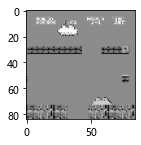

In [11]:
for s in states:
    if s is None:
        continue
    plt.figure(figsize=(2, 2))
    for frame in s:
        plt.imshow(s[-1], cmap='gray', vmin=0, vmax=1)
    display.display(plt.gcf())
    display.clear_output(wait=True)
    
    plt.pause(0.001)  # pause a bit so that plots are updated
    